In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
api_token = userdata.get("supandi")
os.environ["REPLICATE_API_TOKEN"] = api_token

In [ ]:
uploaded = files.upload()

Saving eCommercePK.csv to eCommercePK.csv


In [ ]:
df = pd.read_csv("eCommercePK.csv")
df.head()

,order_id,order_status,order_source,order_date,category,sku,quantity,sales,city
0,5447,Shipped,Whatsapp,04/01/2025,CK,Dng,1,1590,Karachi
1,14127,Shipped,Web,08/01/2025,CK,DIY,1,899,Karachi
2,14213,Shipped,Web,19/01/2025,CK,DIY,1,899,Karachi
3,14333,Shipped,Web,05/02/2025,CK,Simply9,1,990,Karachi
4,14397,Shipped,Web,16/02/2025,CK,Simply9,1,990,Karachi


In [ ]:
def classify_sentiment(sales: float) -> str:
    if sales >= 1000:
        return "Positif"
    elif sales >= 500:
        return "Netral"
    return "Negatif"

df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['sentiment'] = df['sales'].apply(classify_sentiment)
df[['sku', 'category', 'sales', 'sentiment']].head()


,sku,category,sales,sentiment
0,Dng,CK,1590,Positif
1,DIY,CK,899,Netral
2,DIY,CK,899,Netral
3,Simply9,CK,990,Netral
4,Simply9,CK,990,Netral


In [ ]:
llm = Replicate(
    model="meta/llama-2-7b-chat",
    model_kwargs={"temperature": 0.5, "max_new_tokens": 100}
)
df['description'] = df.apply(lambda row: f"Produk kategori {row['category']} dengan kode {row['sku']} terjual seharga {row['sales']} di kota {row['city']}.", axis=1)
df['summary'] = df['description'].head(5).apply(lambda x: llm.invoke(f"Ringkas kalimat berikut secara singkat:\n{x}"))
df[['category', 'sku', 'sales', 'city', 'summary']]


,category,sku,sales,city,summary
0,CK,Dng,1590,Karachi,"Thank you for asking! However, I notice that ..."
1,CK,DIY,899,Karachi,Thank you for your question! I'm happy to hel...
2,CK,DIY,899,Karachi,Thank you for the clarification! Based on the...
3,CK,Simply9,990,Karachi,Thank you for asking! I'm happy to help you w...
4,CK,Simply9,990,Karachi,Thank you for asking! I'm happy to help. Howe...
...,...,...,...,...,...
792,HNS,101-15,8380,Lahore,NaN
793,WD,pta,8950,Rawalpindi,NaN
794,HNS,101-15,9500,Ghotki,NaN
795,HNS,101-12,11900,Lahore,NaN


In [ ]:
df_final = df[['category', 'sku', 'sales', 'city', 'sentiment', 'summary']]
df_final.to_csv("hasil_proyek_supandi.csv", index=False)
files.download("hasil_proyek_supandi.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

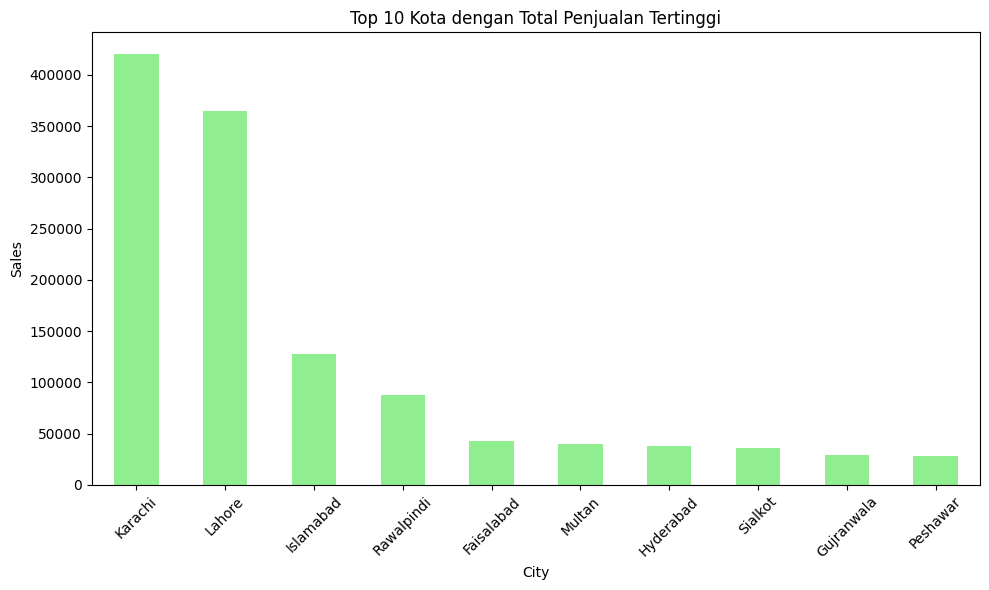

In [ ]:
df = pd.read_csv("hasil_proyek_supandi.csv")
df_top = df.groupby("city")["sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
df_top.plot(kind="bar", color="lightgreen")
plt.title("Top 10 Kota dengan Total Penjualan Tertinggi")
plt.xlabel("City")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top10_penjualan_per_kota.png")
plt.savefig("visualisasi_penjualan.png")


In [ ]:
files.download("visualisasi_penjualan.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>